## 머신러닝

데이터 : 당뇨병 유무와 신체검사 데이터

Pregnancies : 임신 횟수
Glucose : 포도당
BloodPressure : 혈압
SkinThickness : 피부두께
Insulin : 인슐린
BMI : BMI
DiabetesPredigreeFunction : 당뇨병 혈통기능 
Age : 나이
Outcome : 당뇨병 유무

### 1. 데이터 탐색

#### 1-1 시각화 포함 EDA 시행하시오

In [1]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/ADPclass/ADP_book_ver01/main/data/diabetes_for_test.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


종속변수는 Outcome 이고 나머지 변수는 독립변수이다.  
모든 독립변수가 수치형, 순서형 변수임을 알 수 있다.  
종속변수 Outcome 은 0, 1인 범주형 변수이므로 종속변수에 따른 독립변수의 분포를  살펴보자.

In [3]:
diabetes = df.groupby('Outcome').mean()
diabetes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,36.934000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


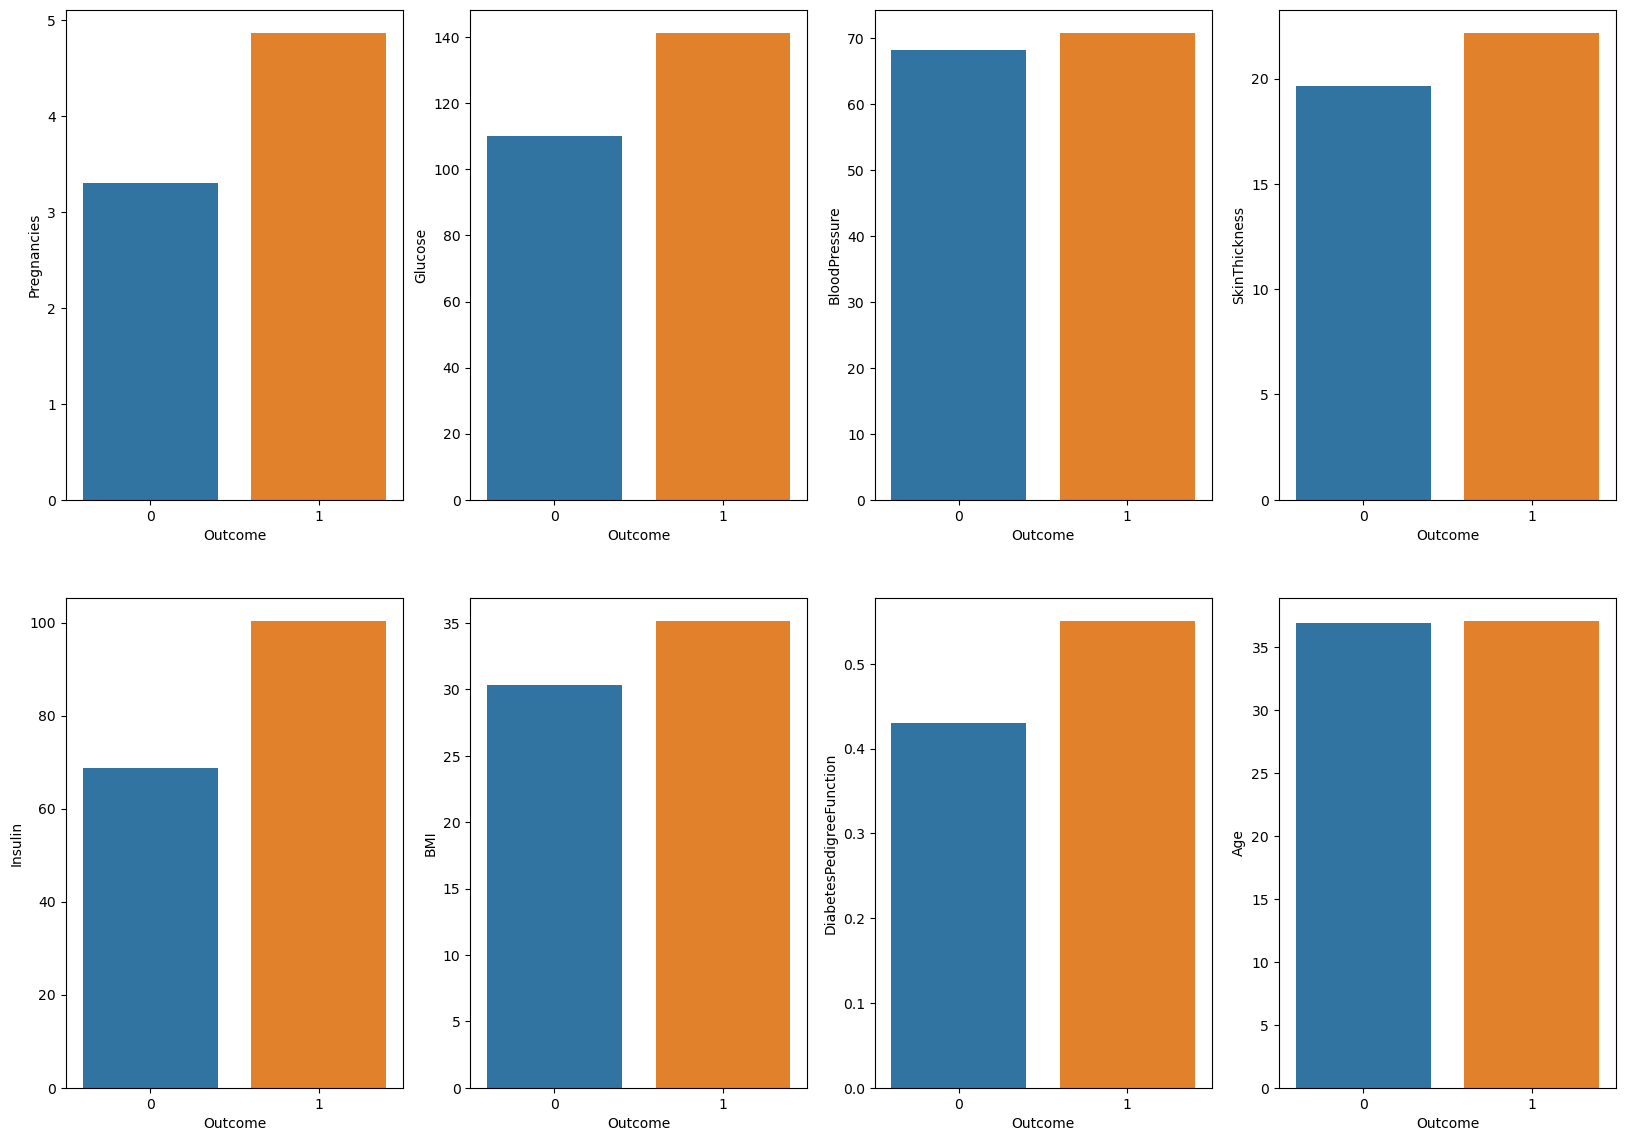

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, axes = plt.subplots(2,4, figsize = (20, 14))
for i in range(8):
    sns.barplot(x = diabetes.index, y = diabetes.iloc[:, i], ax = axes[i // 4][i % 4])

시각화를 해석하면 다음과 같다.
+ 당뇨병이 있는 사람이 없는 사람보다 Pregnancies 의 평균 수치가 높다.
+ 당뇨병이 있는 사람이 없는 사람보다 Glucose 의 평균 수치가 높다.
+ 당뇨병이 있는 사람이 없는 사람보다 BloodPressure 의 평균 수치가 높다.
+ 당뇨병이 있는 사람이 없는 사람보다 Insulin 의 평균 수치가 높다.

종속변수와 독립변수의 관계를 시각화 했으니 이번엔 독립변수들 간의 상관관계를 살펴보자.

<Axes: >

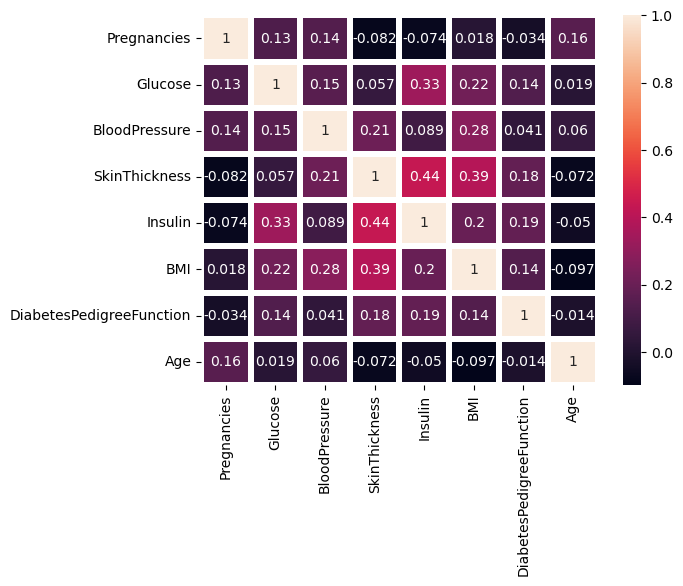

In [5]:
corr = df.drop(['Outcome'], axis= 1).corr(method = 'pearson')
sns.heatmap(corr,
            xticklabels=corr.columns,
            yticklabels=corr.columns, 
            annot = True, linewidths= 3)

독립변수들 간의 상관관계를 살펴보았을 때 0.8 이상의 강한 상관관계를 가지는 변수는 없으니 모든 변수를 사용해도 될 것으로 보인다.

#### 1-2 이상치를 식별하고 처리하시오

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


결측치는 없는 것으로 보인다.  
독립변수들이 모두 수치형 변수이므로 boxplot 으로 분포를 살표보자.

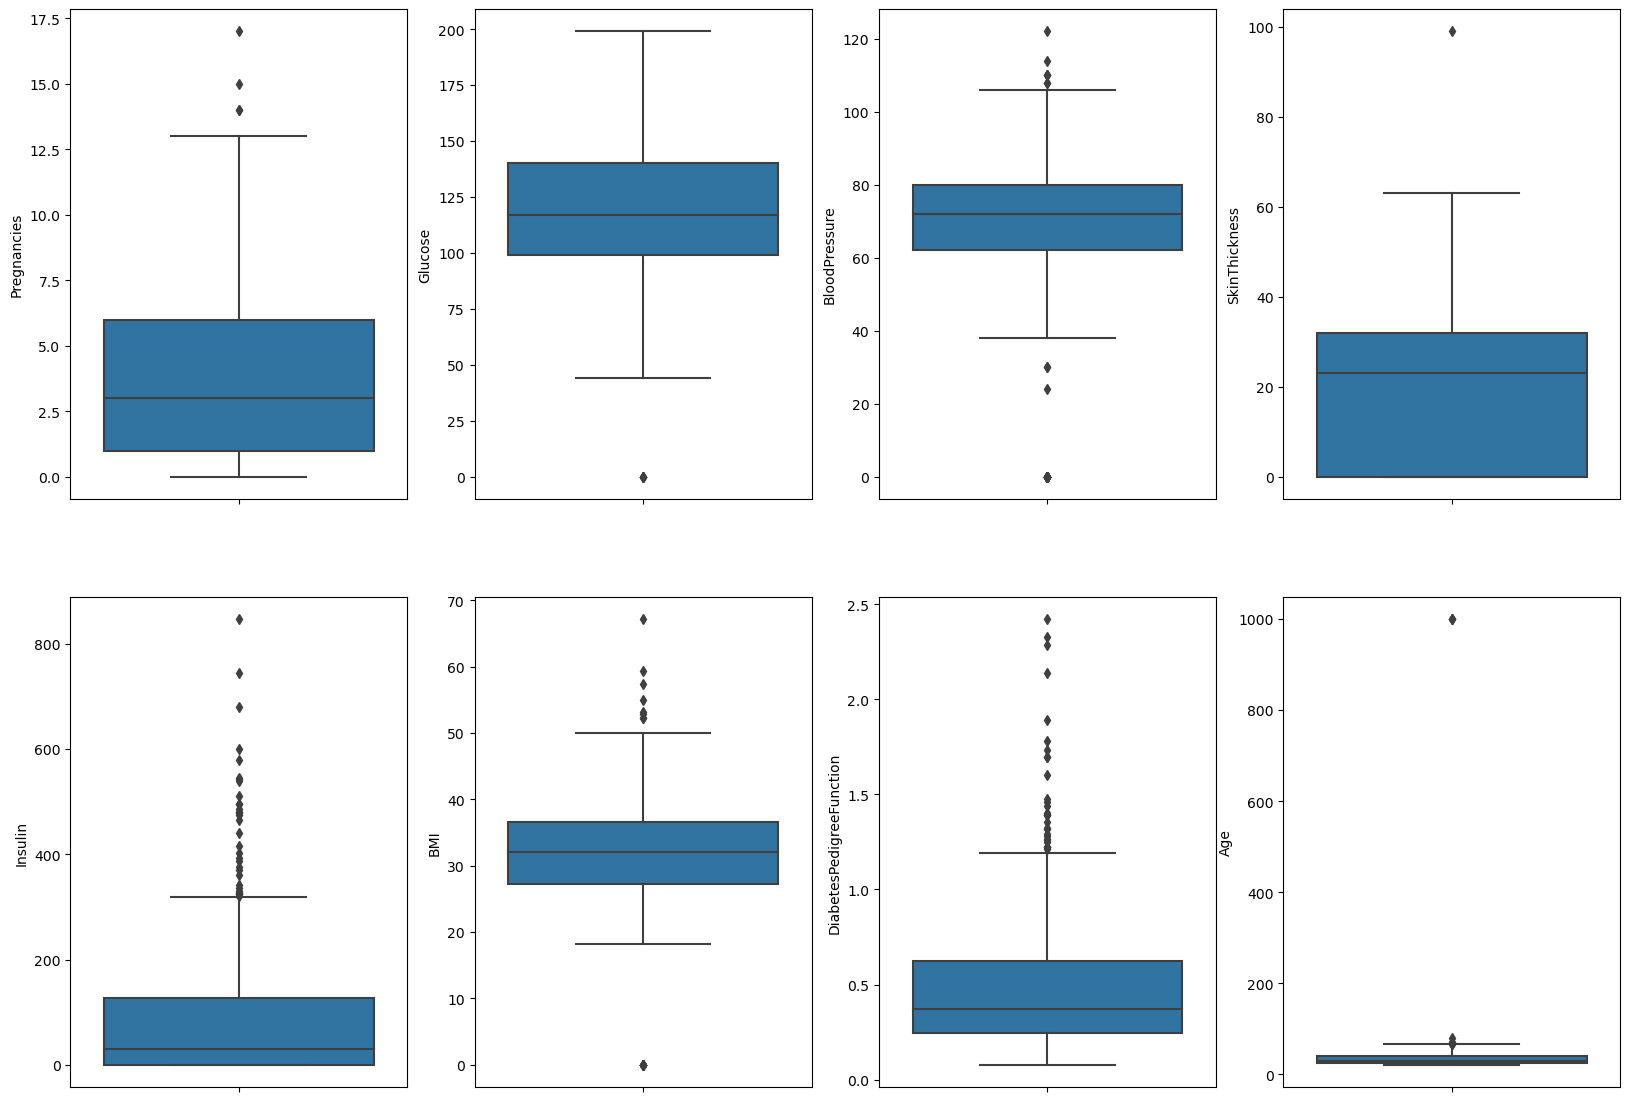

In [7]:
fig, axes = plt.subplots(2, 4, figsize = (20, 14))
for i in range(8):
    sns.boxplot(y = df.iloc[:, i], ax = axes[i // 4][i % 4])
    
plt.show()

boxplot 으로 시각화 하였을 때 Age 는 확실히 이상치라고 할 수 있는 값이 존재한다.  
나머지 변수들은 실제로 이상치를 가진 사람이 있을 수 있으니 데이터에 대한 정보를 좀 더 확인할 필요가 있다.  
따라서 Age 의 이상치만 처리해주자.  
처리해주는 방식으로는 중앙값으로 대치하자.

<Axes: ylabel='Age'>

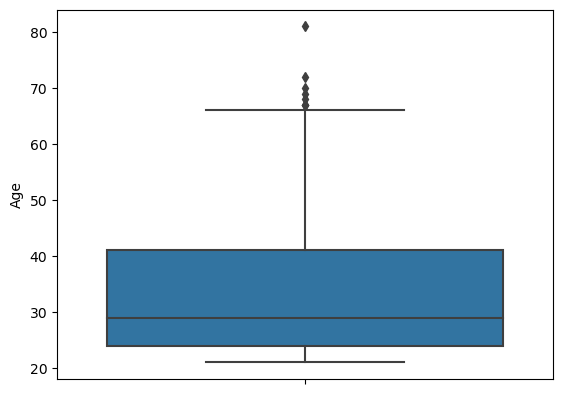

In [8]:
# boxplot 으로 보았을 때 Age 의 이상치는 1000 에 가까운 값에 존재한다.
import numpy as np
outlier = df[df.Age > 900]
df.loc[outlier.index, 'Age'] = np.nan
df.Age = df.Age.fillna(df.Age.median())

sns.boxplot(y = df.Age)

또한 혈압, 포도당, BMI 가 0이면 안되므로 이상치라고 판단하여 중앙값으로 대체해주자.

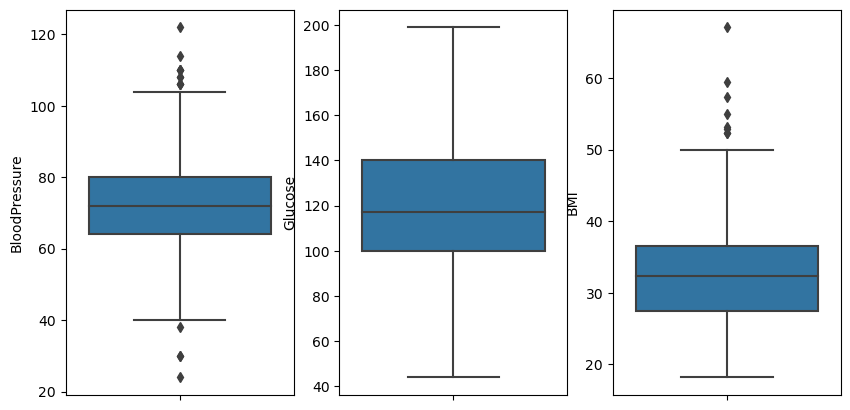

In [9]:
outlier1 = df[df.BloodPressure == 0]
outlier2 = df[df.Glucose == 0]
outlier3 = df[df.BMI == 0]
df.loc[outlier1.index, 'BloodPressure'] = np.nan
df.loc[outlier2.index, 'Glucose'] = np.nan
df.loc[outlier3.index, 'BMI'] = np.nan
df.BloodPressure = df.BloodPressure.fillna(df.BloodPressure.median())
df.Glucose = df.Glucose.fillna(df.Glucose.median())
df.BMI = df.BMI.fillna(df.BMI.median())

fig, axes = plt.subplots(1,3, figsize = (10, 5))
sns.boxplot(y = df.loc[:, 'BloodPressure'], ax = axes[0])
sns.boxplot(y = df.loc[:, 'Glucose'], ax = axes[1])
sns.boxplot(y = df.loc[:, 'BMI'], ax = axes[2])
plt.show()

또한 피부두께의 boxplot 을 보면 100 부근에 값이 모여있는 걸 알 수 있는데 피부두께가 100 정도 되지 않으므로 이상치로 판단하고 중앙값으로 처리한다.

In [10]:
df[df.SkinThickness > 80] # 99는 이상치라고 판단하고 중앙값으로 대체하자.

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
579,2,197.0,70.0,99,0,34.7,0.575,62.0,1


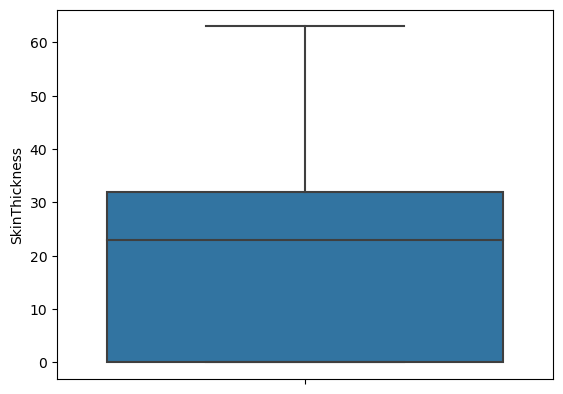

In [11]:
outlier = df[df.SkinThickness == 99]
df.loc[outlier.index, 'SkinThickness'] = np.nan
df.SkinThickness = df.SkinThickness.fillna(df.SkinThickness.median())

sns.boxplot(y = df.loc[:, 'SkinThickness'])
plt.show()

#### 1-3 앞선 두 단계에서 발견한 향후 분석 시에 고려해야 하 사항을 작성하시오.

In [12]:
# 이상치 처리 후의 데이터의 기술통계량을 살펴보자
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,20.437500,79.799479,32.455208,0.471876,33.191406,0.348958
std,3.369578,30.438286,12.096642,15.698554,115.244002,6.875177,0.331329,11.683509,0.476951
min,0.000000,44.000000,24.000000,0.000000,0.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,0.000000,0.000000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,63.000000,846.000000,67.100000,2.420000,81.000000,1.000000


분석간의 변수 간 데이터의 범위가 차이가 남을 알 수 있다.  
따라서 선형 모델 사용 시 scale 을 적용할 필요가 있다.

### 2. 클래스 불균형 처리

#### 2-1 업 샘플링 과정을 설명하고 결과를 작성하시오.

오버 샘플링은 소수의 레이블을 지닌 데이터세트를 다수 레이블을 지닌 데이터세트의 수만큼 증식시켜 학습에 사용하기 위한 충분한 양과 비율의 데이터를 확보하는 기법이다.  
데이터의 손실이 없어 주로 사용된다.  
오버 샘플링 종류에는 RandomOverSampling 과 SMOTE 등이 있다.

RandomOverSampling
+ 소수 클래스에 속하는 데이터의 관측치를 복사하는 방식으로 데이터를 증식한다.
+ 데이터를 단순 복사하는 방식이므로 기존의 데이터와 동일한 복제 데이터를 생성한다.
+ Random OverSampling 은 소수 클래스에 과적합이 발생할 가능성이 있다는 단점이 있지만, 사용방법이 간단하다는 장점이 있다.

SMOTE
+ 적은 데이터세트에 있는 개별 데이터들의 k-최근접 이웃을 찾아 해당 데이터와 k개 이웃들의 차이를 일정한 값으로 만들어 기존 데이터와 약간의 차이를 지닌 새로운 데이터를 생성하는 방식이다.
+ SMOTE 는 Resampling 방식보다 처리 속도가 느리다는 단점이 있지만, 데이터를 단순히 동일하게 증식시키는 방식이 아니기 떄문에 과적합 문제를 예방할 수 있다는 장점이 있다.

In [17]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE(k_neighbors=3)

X = df.drop(['Outcome'], axis= 1)
y = df['Outcome']

x_sm, y_sm = oversample.fit_resample(X, y)

print(y.value_counts())
print(y_sm.value_counts())

0    500
1    268
Name: Outcome, dtype: int64
1    500
0    500
Name: Outcome, dtype: int64


#### 2-2 언더 샘플링 과정을 설명하고 결과를 작성하시오.

다수의 레이블을 가진 데이터를 샘플링하여 소수의 데이터세트가 가진 레이블의 수 수준으로 감소시키는 기법이다.  
데이터 불균형 문제는 피할 수 있지만 전체 데이터 수가 급격하게 감소하여 학습 성능을 떨어뜨릴 수 있다.

In [19]:
from imblearn.under_sampling import RandomUnderSampler
undersample = RandomUnderSampler()
x_under, y_under = undersample.fit_resample(X, y)

print(y.value_counts())
print(y_under.value_counts())

0    500
1    268
Name: Outcome, dtype: int64
0    268
1    268
Name: Outcome, dtype: int64


#### 2-3 둘 중 하나를 선택하고 선택한 이유를 서술하시오.

전체 데이터가 총 768개이고 그 중 환자 수는 268명이므로 Undersampling 을 사게 되면 데이터가 너무 적어지게 되므로 과적합의 위험이 있으므로 이 데이터에서는 오버 샘플링이 적합하다고 판단된다.

### 3. 모델링

#### 3-1 최소 3개 이상의 알고리즘을 제시하고 정확도 측면의 모델 1개와 속도 측면의 모델 1개를 선정하시오.

분류분석 모델의 알고리즘으로 로지스틱 회귀분석, xgboostClassifier, SVM 등이 있다.  
속도 측면의 모델로 로지스틱회귀분석, 정확도 측면 모델로 xgb 모델을 사용하겠다.

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier

log = LogisticRegression()
svc = SVC(C=[])
xgb = XGBClassifier()

#### 3-2 모델을 비교하고 결과를 설명하시오.

In [32]:
from sklearn.model_selection import train_test_split, GridSearchCV
import time
import warnings
warnings.filterwarnings(action='ignore')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, stratify = y) # 훈련, 테스트 셋 분리

oversample = SMOTE(k_neighbors=3)
X_re_train, y_re_train = oversample.fit_resample(X_train, y_train)

start = time.time()
log.fit(X_re_train, y_re_train)
end = time.time()

y_log_pred = log.predict(X_test)

print('log model 걸린 시간 :', end-start)
print('log model accuracy :', log.score(X_test, y_test))

log model 걸린 시간 : 0.0694119930267334
log model accuracy : 0.7142857142857143


In [51]:
# XGBClassifier 와 SVC 는 파라미터에 따라 정확도 차이가 크므로 간단한 GridSearchCV 를 통해 최적의 파라미터를 찾자.
param_grid = {'C' : [0.01, 0.1, 1, 10, 100, 1000], 'gamma' : [0.001, 0.01, 0.1, 1, 10, 100]}
svc = SVC()
grid_svc = GridSearchCV(svc, param_grid, scoring= 'accuracy', cv = 5)
grid_svc.fit(X_re_train, y_re_train)

grid_svc.best_params_

{'C': 100, 'gamma': 0.01}

In [52]:
svc = SVC(C=100, gamma = 0.01)

start = time.time()
svc.fit(X_re_train, y_re_train)
end = time.time()

y_svc_pred = svc.predict(X_test)

print('svc model 걸린 시간 :', end-start)
print('svc model accuracy :', svc.score(X_test, y_test))

svc model 걸린 시간 : 0.13357138633728027
svc model accuracy : 0.645021645021645


In [53]:
# XGBClassifier 와 SVC 는 파라미터에 따라 정확도 차이가 크므로 간단한 GridSearchCV 를 통해 최적의 파라미터를 찾자.
param_grid = {'max_depth' : [3,4,5,6], 'min_samples_split' : np.arange(3, 30, 2)}
xgb = XGBClassifier()
grid_xgb = GridSearchCV(xgb, param_grid, scoring= 'accuracy', cv = 5)
grid_xgb.fit(X_re_train, y_re_train)

grid_xgb.best_params_

{'max_depth': 3, 'min_samples_split': 3}

In [55]:
xgb = XGBClassifier(max_depth=3 , min_samples_split = 3)

start = time.time()
xgb.fit(X_re_train, y_re_train)
end = time.time()

y_xgb_pred = xgb.predict(X_test)

print('xgb model 걸린 시간 :', end-start)
print('xgb model accuracy :', xgb.score(X_test, y_test))

xgb model 걸린 시간 : 0.1335291862487793
xgb model accuracy : 0.7445887445887446


예상대로 로지스틱 회귀분석이 가장 속도가 빨랐고 XGBClassifier 은 가장 정확도가 높았다.  
정확도를 올리기 위해 GridSearchCV 를 이용해 간단하게 파라미터를 튜닝해주었다.

#### 3-3 속도 개선을 위한 차원 축소 방법을 설명하고 수행하시오. 그리고 예측 성능과 속도를 비교하고 결과를 작성하시오.

속도 개선을 위한 차원 축소 방법으로는 PCA 와 변수선택법을 통해 변수를 뽑는 방법이 있다.  
그 중 PCA 를 이용해 차원축소를 하겠다.  
PCA 를 사용할 때는 데이터의 스케일에 따라 주성분이 설명가능한 분산량이 달라질 수 있으므로 데이터 스케일링을 해주어야 한다.

In [73]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaler = StandardScaler()
X_scaled_train = scaler.fit_transform(X_train)
X_scaled_test = scaler.fit_transform(X_test)

pca = PCA(n_components=8)
X_train_pca = pca.fit(X_scaled_train)

explain_var = pca.explained_variance_ratio_
explain_var[:5].sum()

0.8222893451373946

In [80]:
X_train_pca = pca.fit_transform(X_scaled_train)
X_train_pca


array([[-0.65720698, -1.4403181 , -0.49185998,  0.03565512,  0.54167603],
       [ 1.07439589, -0.49755273,  1.37842598, -1.1318988 , -0.5634391 ],
       [-0.46265211, -0.70530828, -0.38300317,  0.96599858,  0.65056485],
       ...,
       [ 0.49714254, -2.13401411,  0.02140488,  0.82321554, -0.64992248],
       [-0.6022207 , -0.12691249, -1.64685564, -0.10156935,  1.05949785],
       [ 0.68299495,  1.750985  , -1.40427204, -0.43093357,  1.64549647]])

주성분이 5개일 때 전체 데이터의 82% 를 설명할 수 있으므로 주성분을 5개로 설정하겠다.

In [83]:
pca = PCA(n_components=5)
X_train_pca = pca.fit_transform(X_scaled_train)
X_test_pca = pca.fit_transform(X_scaled_test)

log = LogisticRegression()
start = time.time()
log.fit(X_train_pca, y_train)
end = time.time()

y_log_pred = log.predict(X_test_pca)
print('log model 걸린 시간 :', end-start)
print('log model accuracy :', log.score(X_test_pca, y_test))

svc = SVC(C=100, gamma=0.01)
start = time.time()
svc.fit(X_train_pca, y_train)
end = time.time()

y_svc_pred = svc.predict(X_test_pca)
print('svc model 걸린 시간 :', end-start)
print('svc model accuracy :', svc.score(X_test_pca, y_test))

xgb = XGBClassifier(max_depth = 3, min_samples_split = 3)
start = time.time()
xgb.fit(X_train_pca, y_train)
end = time.time()

y_xgb_pred = xgb.predict(X_test_pca)
print('xgb model 걸린 시간 :', end-start)
print('xgb model accuracy :', xgb.score(X_test_pca, y_test))

log model 걸린 시간 : 0.009000539779663086
log model accuracy : 0.7186147186147186
svc model 걸린 시간 : 0.061601877212524414
svc model accuracy : 0.7012987012987013
xgb model 걸린 시간 : 0.14386677742004395
xgb model accuracy : 0.670995670995671


예측 성능의 측면에서는 성능이 조금 떨어졌지만 속도 측면에서는 차원 축소에 의해 빨라졌다.  
또한 트리기반 모델인 XGBClassifier 의 경우는 스케일링을 필요로 하지 않으므로 스케일링을 한 PCA 를 적용하니 성능이 떨어졌다고 판단된다.  
데이터 셋의 크기가 커지고 열의 개수가 많아진다면 PCA 를 통해 차원을 축소하고 모델링을 하는 것이 시간 측면에서는 큰 도움이 될 것이라 판단된다.